A homemade Metropolis-Hastings MCMC sampler, made by Christina W. Lindberg.

In [1]:
from scipy.stats import norm, uniform
from scipy.stats import multivariate_normal as mv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gp_sandbox as cgp
import pandas as pd
import george

In [2]:
#import file into a pandas dataframe
df = pd.read_csv('3200_lc_49627_to_49787.txt', delimiter=' ',header=None, names=['x','y'], dtype={'x':float, 'y':float})
pre_x = df.x
pre_y = df.y
cap = 2000
#sample only from the first 2000 points for x and y (out of 400,000ish...)
data_x, data_y, yerr = cgp.sample_data(pre_x[0:cap], pre_y[0:cap], 0.2, int(0.1*len(pre_x[0:cap])), 0, 0)  

In [6]:
#priors
def ln_prior(x, minx, maxx):
    if minx <= x <= maxx:
        return 0
    return -np.inf

def fun_generator(log_amp, gamma, log_period):#amp=-0.95287, gamma=17.42676, log_period=-1.896):  
    #x = data_x-2.449627*10**6
    amp = np.exp(log_amp)
    #guess the kernel numbers 
    kernel = amp*george.kernels.ExpSine2Kernel(gamma=gamma, log_period=log_period) #optimal gamma was ~15
    gp = george.GP(kernel)
    
    gp.compute(data_x, yerr)
    
    return gp.lnlikelihood(data_y)
    
    #pred, pred_var = gp.predict(data_y, data_x, return_var=True)

    #optimize the fit
    #gp2, ln_like2, fun = cgp.optimize(data_y,gp,gp.lnlikelihood, print_results=False)
    #return fun

#density function
def p(x):
    #return uniform(-10, 20).pdf(x)
    #return norm(2, np.sqrt(2)).pdf(x)
    return fun_generator(log_amp=0, gamma=17.42676, log_period=x)


#final density function
def ln_f(x, minx, maxx):
    prior = ln_prior(x, minx, maxx)
    
    #print(minx, maxx, prior, p(x))
    
    if np.isneginf(prior) == True:
        return -np.inf
    
    return prior + p(x)

#proposal function
def q(x):
    return (norm(x, 0.0001).rvs(size=1))

def sampler(x, acpt, minx=-np.inf, maxx=np.inf):
    x0 = x
    p0 = ln_f(x0, minx, maxx)
    
    x1 = q(x0)
    p1 = ln_f(x1, minx, maxx)
    
    print(x0, x1, p0, p1)
    
    r = np.random.random()
    
    if((p1) - (p0) > np.log(r)):
        x = x1
        acpt += 1
    
    return(x, acpt)

In [17]:
x = -2 #starting value
n = 2000   #iterations
i = 0   #counter for iterations
results = np.zeros(n)   #for storing results
acpt = 0

while i < n:
    x, acpt = sampler(x, acpt, minx=-3.178 ,maxx=-0.1) #1-24 hrs
    results[i] = x
    i += 1
    
print("Acceptance percentage: " + "{0:.0f}%".format(100. * acpt / i))

(-2, array([-1.99990898]), -260906.11826621526, -260862.41299374003)
(array([-1.99990898]), array([-1.99974279]), -260862.41299374003, -260779.78479151367)
(array([-1.99974279]), array([-1.99975931]), -260779.78479151367, -260788.15297903679)
(array([-1.99974279]), array([-1.99984339]), -260779.78479151367, -260830.22357647825)
(array([-1.99974279]), array([-1.99986487]), -260779.78479151367, -260840.8298583478)
(array([-1.99974279]), array([-1.99966572]), -260779.78479151367, -260740.30987278777)
(array([-1.99966572]), array([-1.99977762]), -260740.30987278777, -260797.39207835743)
(array([-1.99966572]), array([-1.99964045]), -260740.30987278777, -260727.22105692516)
(array([-1.99964045]), array([-1.99967366]), -260727.22105692516, -260744.40867644318)
(array([-1.99964045]), array([-1.99980268]), -260727.22105692516, -260809.96531154291)
(array([-1.99964045]), array([-1.9996417]), -260727.22105692516, -260727.86863324899)
(array([-1.9996417]), array([-1.99956009]), -260727.86863324899

(array([-1.99581474]), array([-1.99574505]), -258918.3990528727, -258906.21791234406)
(array([-1.99574505]), array([-1.99570064]), -258906.21791234406, -258899.08209219365)
(array([-1.99570064]), array([-1.99576781]), -258899.08209219365, -258910.06364768452)
(array([-1.99570064]), array([-1.99570352]), -258899.08209219365, -258899.53035583039)
(array([-1.99570352]), array([-1.99552512]), -258899.53035583039, -258875.68150655922)
(array([-1.99552512]), array([-1.9955368]), -258875.68150655922, -258876.99989784067)
(array([-1.99552512]), array([-1.99561882]), -258875.68150655922, -258887.21822708796)
(array([-1.99552512]), array([-1.99553158]), -258875.68150655922, -258876.40671305996)
(array([-1.99552512]), array([-1.99553621]), -258875.68150655922, -258876.93230514534)
(array([-1.99552512]), array([-1.99551112]), -258875.68150655922, -258874.14525402436)
(array([-1.99551112]), array([-1.99561235]), -258874.14525402436, -258886.35188660648)
(array([-1.99551112]), array([-1.99572384]), 

(array([-1.99510907]), array([-1.99490582]), -258850.73874340634, -258853.81799937494)
(array([-1.99510907]), array([-1.99516073]), -258850.73874340634, -258851.52782719699)
(array([-1.99510907]), array([-1.99519986]), -258850.73874340634, -258852.55613623085)
(array([-1.99510907]), array([-1.99513438]), -258850.73874340634, -258851.04480372727)
(array([-1.99513438]), array([-1.99523819]), -258851.04480372727, -258853.92528761289)
(array([-1.99513438]), array([-1.99532421]), -258851.04480372727, -258858.30936803253)
(array([-1.99513438]), array([-1.99519815]), -258851.04480372727, -258852.50328588483)
(array([-1.99513438]), array([-1.99515517]), -258851.04480372727, -258851.41188976998)
(array([-1.99515517]), array([-1.99529981]), -258851.41188976998, -258856.88103727423)
(array([-1.99515517]), array([-1.99521303]), -258851.41188976998, -258852.98609596997)
(array([-1.99515517]), array([-1.99522183]), -258851.41188976998, -258853.29682776739)
(array([-1.99515517]), array([-1.99504802])

(array([-1.99510461]), array([-1.99514306]), -258850.7007402356, -258851.18541012055)
(array([-1.99510461]), array([-1.99524634]), -258850.7007402356, -258854.26285884847)
(array([-1.99510461]), array([-1.99510015]), -258850.7007402356, -258850.66767848856)
(array([-1.99510015]), array([-1.99490923]), -258850.66767848856, -258853.6862512443)
(array([-1.99490923]), array([-1.99496532]), -258853.6862512443, -258851.90709823905)
(array([-1.99496532]), array([-1.99478524]), -258851.90709823905, -258860.19757907538)
(array([-1.99496532]), array([-1.99507704]), -258851.90709823905, -258850.57246634818)
(array([-1.99507704]), array([-1.99513597]), -258850.57246634818, -258851.06908601179)
(array([-1.99507704]), array([-1.99509098]), -258850.57246634818, -258850.61456009524)
(array([-1.99509098]), array([-1.99506746]), -258850.61456009524, -258850.5705096302)
(array([-1.99506746]), array([-1.99508259]), -258850.5705096302, -258850.5836050534)
(array([-1.99508259]), array([-1.995096]), -258850.

(array([-1.99503588]), array([-1.99501642]), -258850.7193179754, -258850.92930877491)
(array([-1.99503588]), array([-1.99510311]), -258850.7193179754, -258850.6890964437)
(array([-1.99510311]), array([-1.99518231]), -258850.6890964437, -258852.04880175617)
(array([-1.99510311]), array([-1.99515718]), -258850.6890964437, -258851.45294124281)
(array([-1.99515718]), array([-1.99538091]), -258851.45294124281, -258862.19688308946)
(array([-1.99515718]), array([-1.99516761]), -258851.45294124281, -258851.68175198653)
(array([-1.99516761]), array([-1.99516199]), -258851.68175198653, -258851.55506403747)
(array([-1.99516199]), array([-1.99509263]), -258851.55506403747, -258850.62257290486)
(array([-1.99509263]), array([-1.99507014]), -258850.62257290486, -258850.5688251096)
(array([-1.99507014]), array([-1.99503279]), -258850.5688251096, -258850.74668128608)
(array([-1.99503279]), array([-1.99493385]), -258850.74668128608, -258852.81480091749)
(array([-1.99503279]), array([-1.99509041]), -2588

(array([-1.99509433]), array([-1.99504493]), -258850.63158962241, -258850.65236092248)
(array([-1.99504493]), array([-1.99491834]), -258850.65236092248, -258853.34730777604)
(array([-1.99504493]), array([-1.99511596]), -258850.65236092248, -258850.80671160709)
(array([-1.99511596]), array([-1.99512267]), -258850.80671160709, -258850.8840144311)
(array([-1.99512267]), array([-1.99505875]), -258850.8840144311, -258850.58776783684)
(array([-1.99505875]), array([-1.99491669]), -258850.58776783684, -258853.40730400814)
(array([-1.99505875]), array([-1.99511252]), -258850.58776783684, -258850.77131468896)
(array([-1.99511252]), array([-1.9949651]), -258850.77131468896, -258851.9127151398)
(array([-1.99511252]), array([-1.99492542]), -258850.77131468896, -258853.09730529433)
(array([-1.99511252]), array([-1.99512042]), -258850.77131468896, -258850.85688404698)
(array([-1.99512042]), array([-1.99508861]), -258850.85688404698, -258850.60404756147)
(array([-1.99508861]), array([-1.99519601]), -2

(array([-1.9950896]), array([-1.99520111]), -258850.60834672966, -258852.59502999316)
(array([-1.99520111]), array([-1.995233]), -258852.59502999316, -258853.71853615803)
(array([-1.995233]), array([-1.99509689]), -258853.71853615803, -258850.64641207934)
(array([-1.99509689]), array([-1.99510065]), -258850.64641207934, -258850.67111766801)
(array([-1.99510065]), array([-1.99499888]), -258850.67111766801, -258851.19552022064)
(array([-1.99499888]), array([-1.99488987]), -258851.19552022064, -258854.47004106166)
(array([-1.99499888]), array([-1.99504157]), -258851.19552022064, -258850.67491693588)
(array([-1.99504157]), array([-1.99516427]), -258850.67491693588, -258851.60540900831)
(array([-1.99516427]), array([-1.99510862]), -258851.60540900831, -258850.73465238468)
(array([-1.99510862]), array([-1.99497111]), -258850.73465238468, -258851.76548870094)
(array([-1.99497111]), array([-1.99494707]), -258851.76548870094, -258852.4053230733)
(array([-1.99497111]), array([-1.99506847]), -258

(array([-1.99513737]), array([-1.99516649]), -258851.09116209164, -258851.65588598198)
(array([-1.99513737]), array([-1.99516966]), -258851.09116209164, -258851.72963290464)
(array([-1.99516966]), array([-1.99506275]), -258851.72963290464, -258850.57760157521)
(array([-1.99506275]), array([-1.99490543]), -258850.57760157521, -258853.83333748384)
(array([-1.99506275]), array([-1.99531319]), -258850.57760157521, -258857.6459691136)
(array([-1.99506275]), array([-1.99522176]), -258850.57760157521, -258853.29423813018)
(array([-1.99506275]), array([-1.99505428]), -258850.57760157521, -258850.60367111626)
(array([-1.99505428]), array([-1.99522476]), -258850.60367111626, -258853.40465038587)
(array([-1.99505428]), array([-1.99507078]), -258850.60367111626, -258850.56867507362)
(array([-1.99507078]), array([-1.99504958]), -258850.56867507362, -258850.62564814242)
(array([-1.99504958]), array([-1.99498723]), -258850.62564814242, -258851.41260787629)
(array([-1.99504958]), array([-1.99514152]),

(array([-1.99509018]), array([-1.99493072]), -258850.61088055265, -258852.91798068228)
(array([-1.99509018]), array([-1.99522666]), -258850.61088055265, -258853.47576544905)
(array([-1.99509018]), array([-1.99502376]), -258850.61088055265, -258850.83958115039)
(array([-1.99509018]), array([-1.99513382]), -258850.61088055265, -258851.03627103858)
(array([-1.99509018]), array([-1.99518628]), -258850.61088055265, -258852.15704108274)
(array([-1.99518628]), array([-1.99510259]), -258852.15704108274, -258850.68521678582)
(array([-1.99510259]), array([-1.99504898]), -258850.68521678582, -258850.62867522601)
(array([-1.99504898]), array([-1.99494924]), -258850.62867522601, -258852.34209137538)
(array([-1.99504898]), array([-1.99513502]), -258850.62867522601, -258851.05442077474)
(array([-1.99513502]), array([-1.99516486]), -258851.05442077474, -258851.61873590443)
(array([-1.99513502]), array([-1.9952082]), -258851.05442077474, -258852.82339584272)
(array([-1.9952082]), array([-1.99519411]), 

(array([-1.99505151]), array([-1.99500351]), -258850.61591567003, -258851.11814762061)
(array([-1.99500351]), array([-1.99518802]), -258851.11814762061, -258852.20579306764)
(array([-1.99500351]), array([-1.99497759]), -258851.11814762061, -258851.61630142847)
(array([-1.99500351]), array([-1.99511933]), -258851.11814762061, -258850.84405128952)
(array([-1.99511933]), array([-1.99515746]), -258850.84405128952, -258851.45867894837)
(array([-1.99515746]), array([-1.99518863]), -258851.45867894837, -258852.22277005302)
(array([-1.99518863]), array([-1.99509933]), -258852.22277005302, -258850.66199958901)
(array([-1.99509933]), array([-1.99492347]), -258850.66199958901, -258853.16468994593)
(array([-1.99509933]), array([-1.99525197]), -258850.66199958901, -258854.50516710736)
(array([-1.99509933]), array([-1.99521038]), -258850.66199958901, -258852.8962346414)
(array([-1.99509933]), array([-1.99526836]), -258850.66199958901, -258855.25577760715)
(array([-1.99509933]), array([-1.99516072]),

(array([-1.99500038]), array([-1.99508131]), -258851.16989950818, -258850.58036442808)
(array([-1.99508131]), array([-1.9950297]), -258850.58036442808, -258850.77630807887)
(array([-1.9950297]), array([-1.99504994]), -258850.77630807887, -258850.62373987405)
(array([-1.99504994]), array([-1.99512883]), -258850.62373987405, -258850.96448878627)
(array([-1.99504994]), array([-1.99502402]), -258850.62373987405, -258850.83659164171)
(array([-1.99502402]), array([-1.9950875]), -258850.83659164171, -258850.59964613788)
(array([-1.9950875]), array([-1.99500807]), -258850.59964613788, -258851.04700427831)
(array([-1.99500807]), array([-1.9949372]), -258851.04700427831, -258852.70718936491)
(array([-1.99500807]), array([-1.99511208]), -258851.04700427831, -258850.76702480737)
(array([-1.99511208]), array([-1.99519799]), -258850.76702480737, -258852.49855022464)
(array([-1.99519799]), array([-1.99528814]), -258852.49855022464, -258856.24952676351)
(array([-1.99519799]), array([-1.99510941]), -25

(array([-1.99501029]), array([-1.99501606]), -258851.01412401887, -258850.93404290034)
(array([-1.99501606]), array([-1.99500583]), -258850.93404290034, -258851.08129417585)
(array([-1.99500583]), array([-1.99506241]), -258851.08129417585, -258850.57837178983)
(array([-1.99506241]), array([-1.99513439]), -258850.57837178983, -258851.04488102489)
(array([-1.99513439]), array([-1.99513009]), -258851.04488102489, -258850.98194741047)
(array([-1.99513009]), array([-1.99519271]), -258850.98194741047, -258852.34040895069)
(array([-1.99513009]), array([-1.9952679]), -258850.98194741047, -258855.23368919073)
(array([-1.99513009]), array([-1.99509032]), -258850.98194741047, -258850.61145118056)
(array([-1.99509032]), array([-1.99498725]), -258850.61145118056, -258851.41216450417)
(array([-1.99498725]), array([-1.99491478]), -258851.41216450417, -258853.47745865377)
(array([-1.99498725]), array([-1.9950267]), -258851.41216450417, -258850.80708907696)
(array([-1.9950267]), array([-1.99497136]), -

(array([-1.99519154]), array([-1.99518429]), -258852.30639551851, -258852.10247197055)
(array([-1.99518429]), array([-1.99531693]), -258852.10247197055, -258857.8675114529)
(array([-1.99518429]), array([-1.99528354]), -258852.10247197055, -258856.00985268076)
(array([-1.99518429]), array([-1.99522588]), -258852.10247197055, -258853.44623003493)
(array([-1.99522588]), array([-1.99527756]), -258853.44623003493, -258855.70602022161)
(array([-1.99522588]), array([-1.99525076]), -258853.44623003493, -258854.45254633599)
(array([-1.99522588]), array([-1.99519906]), -258853.44623003493, -258852.53122655308)
(array([-1.99519906]), array([-1.99529582]), -258852.53122655308, -258856.66107960918)
(array([-1.99519906]), array([-1.9952169]), -258852.53122655308, -258853.12037201467)
(array([-1.99519906]), array([-1.99527568]), -258852.53122655308, -258855.61219668647)
(array([-1.99519906]), array([-1.99500753]), -258852.53122655308, -258851.05525478753)
(array([-1.99500753]), array([-1.99479633]), 

(array([-1.99505821]), array([-1.99506101]), -258850.58946656252, -258850.58157018179)
(array([-1.99506101]), array([-1.99498598]), -258850.58157018179, -258851.43757117153)
(array([-1.99506101]), array([-1.99512855]), -258850.58157018179, -258850.96060260458)
(array([-1.99512855]), array([-1.99522657]), -258850.96060260458, -258853.47226334683)
(array([-1.99512855]), array([-1.99502013]), -258850.96060260458, -258850.88234266517)
(array([-1.99502013]), array([-1.99511953]), -258850.88234266517, -258850.84648508547)
(array([-1.99511953]), array([-1.99523551]), -258850.84648508547, -258853.81760357661)
(array([-1.99511953]), array([-1.99512917]), -258850.84648508547, -258850.96918727586)
(array([-1.99511953]), array([-1.99526067]), -258850.84648508547, -258854.89564669889)
(array([-1.99511953]), array([-1.9950997]), -258850.84648508547, -258850.6645694481)
(array([-1.9950997]), array([-1.99520107]), -258850.6645694481, -258852.59396242816)
(array([-1.99520107]), array([-1.99519908]), -2

(array([-1.99506436]), array([-1.99486953]), -258850.57455817386, -258855.38709590962)
(array([-1.99506436]), array([-1.99498976]), -258850.57455817386, -258851.36259226332)
(array([-1.99498976]), array([-1.99500577]), -258851.36259226332, -258851.08226116517)
(array([-1.99500577]), array([-1.99489013]), -258851.08226116517, -258854.45908258521)
(array([-1.99500577]), array([-1.99492248]), -258851.08226116517, -258853.19957136281)
(array([-1.99500577]), array([-1.99500639]), -258851.08226116517, -258851.07257734876)
(array([-1.99500639]), array([-1.99504323]), -258851.07257734876, -258850.66349709348)
(array([-1.99504323]), array([-1.99522539]), -258850.66349709348, -258853.42819518418)
(array([-1.99504323]), array([-1.99499272]), -258850.66349709348, -258851.30628644818)
(array([-1.99499272]), array([-1.99500916]), -258851.30628644818, -258851.03062424206)
(array([-1.99500916]), array([-1.99511042]), -258851.03062424206, -258850.75129803768)
(array([-1.99511042]), array([-1.99504212])

(array([-1.99506396]), array([-1.99510923]), -258850.57523548743, -258850.7401866513)
(array([-1.99506396]), array([-1.9951258]), -258850.57523548743, -258850.92361227761)
(array([-1.99506396]), array([-1.99519064]), -258850.57523548743, -258852.28022426198)
(array([-1.99506396]), array([-1.99513795]), -258850.57523548743, -258851.10032129509)
(array([-1.99513795]), array([-1.99512185]), -258851.10032129509, -258850.87390952115)
(array([-1.99512185]), array([-1.99519999]), -258850.87390952115, -258852.56003639664)
(array([-1.99512185]), array([-1.99531656]), -258850.87390952115, -258857.84596515007)
(array([-1.99512185]), array([-1.99501332]), -258850.87390952115, -258850.97107561782)
(array([-1.99501332]), array([-1.99504012]), -258850.97107561782, -258850.68552578014)
(array([-1.99504012]), array([-1.99512538]), -258850.68552578014, -258850.91827513071)
(array([-1.99512538]), array([-1.99509508]), -258850.91827513071, -258850.6358040648)
(array([-1.99509508]), array([-1.99505539]), -

(array([-1.99514169]), array([-1.99518579]), -258851.16183363172, -258852.14358768455)
(array([-1.99514169]), array([-1.99510463]), -258851.16183363172, -258850.70087908299)
(array([-1.99510463]), array([-1.99510949]), -258850.70087908299, -258850.74249864952)
(array([-1.99510949]), array([-1.99514063]), -258850.74249864952, -258851.1441946229)
(array([-1.99510949]), array([-1.99517951]), -258850.74249864952, -258851.97493258724)
(array([-1.99517951]), array([-1.9953379]), -258851.97493258724, -258859.17528347552)
(array([-1.99517951]), array([-1.99503742]), -258851.97493258724, -258850.70661383856)
(array([-1.99503742]), array([-1.99498827]), -258850.70661383856, -258851.39180927543)
(array([-1.99498827]), array([-1.99507108]), -258851.39180927543, -258850.56864104647)
(array([-1.99507108]), array([-1.99495093]), -258850.56864104647, -258852.29353344816)
(array([-1.99507108]), array([-1.99511201]), -258850.56864104647, -258850.76633981123)
(array([-1.99511201]), array([-1.99517167]), 

(array([-1.99501594]), array([-1.99497394]), -258850.93570993256, -258851.69908363756)
(array([-1.99501594]), array([-1.99501664]), -258850.93570993256, -258850.92637214097)
(array([-1.99501664]), array([-1.99506212]), -258850.92637214097, -258850.57896378636)
(array([-1.99506212]), array([-1.99513251]), -258850.57896378636, -258851.01676025538)
(array([-1.99506212]), array([-1.9951229]), -258850.57896378636, -258850.88674063465)
(array([-1.9951229]), array([-1.99516026]), -258850.88674063465, -258851.51778966421)
(array([-1.9951229]), array([-1.99515142]), -258850.88674063465, -258851.33798034766)
(array([-1.99515142]), array([-1.99517735]), -258851.33798034766, -258851.91920008615)
(array([-1.99515142]), array([-1.99523232]), -258851.33798034766, -258853.69223504339)
(array([-1.99515142]), array([-1.99532143]), -258851.33798034766, -258858.13934320668)
(array([-1.99515142]), array([-1.99511945]), -258851.33798034766, -258850.84552674642)
(array([-1.99511945]), array([-1.99508638]), -

(array([-1.99505624]), array([-1.99503532]), -258850.59613407918, -258850.72411417862)
(array([-1.99503532]), array([-1.99509882]), -258850.72411417862, -258850.65871800829)
(array([-1.99509882]), array([-1.99499082]), -258850.65871800829, -258851.3421966389)
(array([-1.99509882]), array([-1.99495814]), -258850.65871800829, -258852.09374883209)
(array([-1.99509882]), array([-1.99494776]), -258850.65871800829, -258852.38509905303)
(array([-1.99509882]), array([-1.99514135]), -258850.65871800829, -258851.15625170147)
(array([-1.99514135]), array([-1.99484364]), -258851.15625170147, -258856.69194586476)
(array([-1.99514135]), array([-1.99530148]), -258851.15625170147, -258856.97401362151)
(array([-1.99514135]), array([-1.99495047]), -258851.15625170147, -258852.30659426723)
(array([-1.99495047]), array([-1.99485199]), -258852.30659426723, -258856.25453708271)
(array([-1.99495047]), array([-1.99512497]), -258852.30659426723, -258850.91285027447)
(array([-1.99512497]), array([-1.99515217]),

(array([-1.99503802]), array([-1.99509417]), -258850.70180852106, -258850.63064265106)
(array([-1.99509417]), array([-1.99520302]), -258850.63064265106, -258852.65531557723)
(array([-1.99509417]), array([-1.99505259]), -258850.63064265106, -258850.61093887602)
(array([-1.99505259]), array([-1.99509625]), -258850.61093887602, -258850.64258977413)
(array([-1.99509625]), array([-1.99509784]), -258850.64258977413, -258850.65234803301)
(array([-1.99509784]), array([-1.9950177]), -258850.65234803301, -258850.91269672249)
(array([-1.9950177]), array([-1.99508672]), -258850.91269672249, -258850.59668961007)
(array([-1.99508672]), array([-1.99505269]), -258850.59668961007, -258850.61050794672)
(array([-1.99505269]), array([-1.99515828]), -258850.61050794672, -258851.47582176994)
(array([-1.99505269]), array([-1.99500497]), -258850.61050794672, -258851.09485018131)
(array([-1.99500497]), array([-1.99488793]), -258851.09485018131, -258854.55366688559)
(array([-1.99500497]), array([-1.99498131]), 

(array([ 26.49193665,  25.76942929,  23.84274299,  16.61766936,
         25.76942929,  24.80608614,  22.87939984,  23.6019072 ,
         23.6019072 ,  27.4552798 ]),
 array([-1.94997468, -1.94582247, -1.94167026, -1.93751806, -1.93336585,
        -1.92921364, -1.92506144, -1.92090923, -1.91675702, -1.91260482,
        -1.90845261]),
 <a list of 10 Patch objects>)

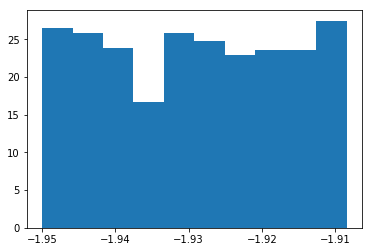

In [12]:
x = np.linspace(-4,0,100)
plt.hist(results, bins="scott", normed=True)
#plt.plot(x, norm(2,np.sqrt(2)).pdf(x))
#plt.plot(x, uniform(minx,maxx-minx).pdf(x))
#plt.plot(x, uniform(3,4).pdf(x))


In [13]:
def auto_corr(results):
    var = np.var(results)

mean: -1.9957223811
variance: 1.73769072474e-06
mean: -1.99506619716
variance: 3.77998717536e-09
mean: -1.9950719424
variance: 3.60135614875e-09
mean: -1.99507241955
variance: 4.28137364504e-09


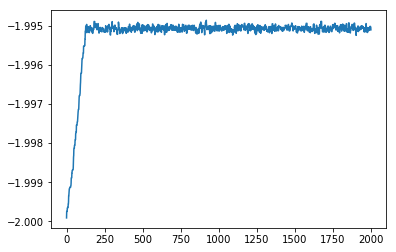

In [18]:
plt.plot(np.arange(n), results)

for j in np.arange(4):
    print('mean: ' + str(np.mean(np.split(results,4)[j])))
    print('variance: ' + str(np.var(np.split(results,4)[j])))

In [55]:
#density function
def p(x, y):
    v = [[2.0, 1.2], [1.2, 2.0]]
    return mv(mean=[2,2], cov=v).pdf([(x),(y)])

#uniform density function
def p_uni(x, y):
    return(uniform(3,4).pdf(x) * uniform(1,8).pdf(y))

#proposal function
def q(x, y):
    v = [[1, 0], [0, 1]]
    return(mv(mean=[x,y], cov=v).rvs(size=1))

def sampler(x, y, acpt):
    x0 = x
    y0 = y
    
    x1, y1 = q(x0, y0)

    p0 = p(x0, y0)
    p1 = p(x1, y1)
    
    r = np.random.random()
    
    #print(x1, y1, p0, p1)
    
    if(np.log(p1) - np.log(p0) > np.log(r)):
        acpt += 1
        x = x1
        y = y1
    
    return(x, y, acpt)

In [56]:
x, y = 3, 4 #starting value
n = 1000   #iterations
i = 0   #counter for iterations
results = np.zeros([2, n])   #for storing results

acpt = 0


while i < n:
    x, y, acpt = sampler(x, y, acpt)
    results[0][i] = x
    results[1][i] = y
    i += 1
    
print("Acceptance percentage: " + "{0:.0f}%".format(100. * acpt / i))

Acceptance percentage: 61%


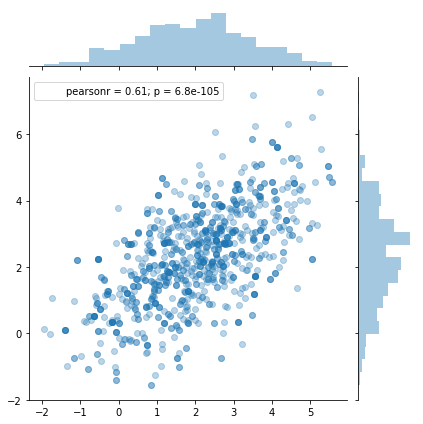

In [57]:
x, y = results[0], results[1]
sns.jointplot(x,y, alpha = 0.3, kind = 'scatter')


corner.py

## Future Plans
* Start using emcee
* Read emcee paper
* Do tutorial in documentation
* Start analyzing sampling effects

* Write down some stuff in a pedagogical manner
* Look for potential examples